[2024-11-08 Fiddler](https://thefiddler.substack.com/p/where-will-the-sorting-hat-put-you)
====================

Fiddler
-------
It wasn't stated, but I'll assume that the hat will grant a student's request if it doesn't
violate having two students in a row in the same house.

If the probability that the $n$th student goes to Graphindor is $G(n)$, then $G(n+1) = (1-G(n))/3$,
and $G(1) = 1$.  My probability is $1 - G(9)$.

In [1]:
maxima('load("solve_rec")')
maxima('solve_rec(G[n+1] = (1-G[n])/3, G[n], G[1] = 1)')

G[n] = (3^(1-n)*(-1)^n)/4+3^(1-n)*(-1)^(n-1)+1/2^2

In [2]:
G(n) = 3^(1-n)*(-1)^n/4 - 3^(1-n)*(-1)^n + 1/4
p = 1-G(9)
(p,numerical_approx(p))

(1640/2187, 0.749885688157293)

I note that
$G(n)$ approaches $1/4$ as $n$ gets large, and $G(n) < 1/4$ when $n$ is even and $G(n) > 1/4$ when $n$ is odd.

Extra credit
------------
My probability as a function of $N$ is

In [3]:
i = var('i')
P(N) = sum((1-G(i))/(N-1), i, 1, N-1)
show(P)

N |--> 3/4*sum((3^i + 3*(-1)^i)/3^i, i, 1, N - 1)/(N - 1)

I expect $P(N)$ to approach $3/4$ as $N$ gets large, and $p$ is close to, but slightly less
than, $3/4$.  Graphing it

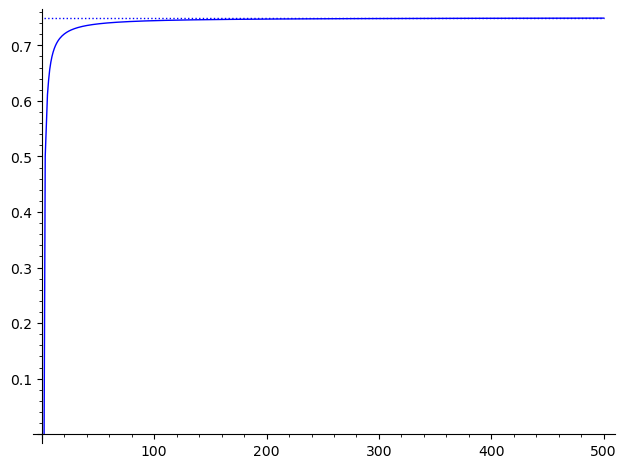

In [4]:
plot(p, x, 2, 500, linestyle='dotted') + line([(n,numerical_approx(P(n))) for n in [2..500]])

Brute forcing it seems like a slow possibility, but there's also a recurrence
relation for $P(N)$,

$$ P(N+1) = \frac{(N-1)P(N)}{N} + \frac{3(1-(-3)^{1-N})}{4N} $$

In [5]:
[(P(n+1) - (n-1)*P(n)/n - 3*(1-(-3)^(1-n))/(4*n)).simplify() for n in [2..10]]

[0, 0, 0, 0, 0, 0, 0, 0, 0]

The solution to the recurrence relation doesn't help, since it
is still $O(N)$.

In [6]:
show(maxima('solve_rec(P[N+1] = (N-1)*P(N)/N + 3*(1-(-3)^(1-N))/(4*N), P[N], P[2] = 0)'))

P[N] = ('sum(%j*((-3)^(2-%j)/(4*%j)+3/(4*%j)),%j,2,N-1))/(N-1)

But, using the recurrence relation means a brute-force search is $O(N)$ rather than
$O(N^2)$.

In [7]:
pp = 0
n = 2
while pp <= p:
    pp = (n-1)*pp/n + 3*(1-(-3)^(1-n))/(4*n)
    n += 1
print((n,numerical_approx(pp-p),pp))

(4922, 5.80734823749768e-9, 336124678185690365750998038693150734094837873641387964570194252169264891736818299924275204161228780842886139817345182876082808907949361253646126981388237746876239528326895595428769467778335335513241413620791490938210939957105653069760789140785884556469831763929966704638352011759908879508361802453892930463138791072790541278615424873555057712553739509838294034953344941601480911744657854041715194066793834457455219727695350279783312532620097113551875298080090944054648813236492369119034130239045236944661855103086515389820082226730114484596252923039470445453891314221604591290501589708852504455825054661249541343495791950157500932829730899722389757441124298885046941283005129725207842445178957243277919117846913953914629346360427867383456673860810573261985308536041848311114477295351224269949361885136159225325360166638875502388781860423706438135895583409192357796194865204278429772430427544566860821489745140389340632326174087128895591393157525123994882369444715222232405

Making the rounds
-----------------
I'd think a square wave, a non-smooth function, would minimize the ratio, so a truncated Fourier series
for a square wave would be a smooth function that is a possibility.